- Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pergunta

### "Vamos investir 75k em marketing, qual deve ser o estoque enviado pra loja? "

- importando a base de dados

In [2]:
base = pd.read_excel('Investimento_x_Venda.xlsx')

In [4]:
base.head()

,Investimento em marketing,Venda Qtd
0,20,118
1,25,142
2,40,225
3,52,260
4,67,295


- Visualizar as informações de forma gráfica

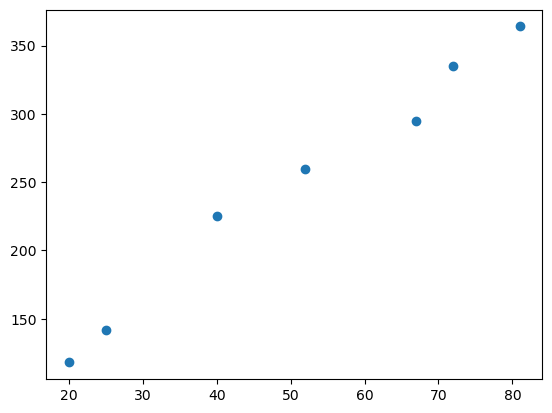

In [5]:
plt.scatter(base['Investimento em marketing'], base['Venda Qtd'])
plt.show()

- Pode-se observar uma relação linear, quanto mais se investe mais vende!

# Traçando uma reta passando por esses pontos

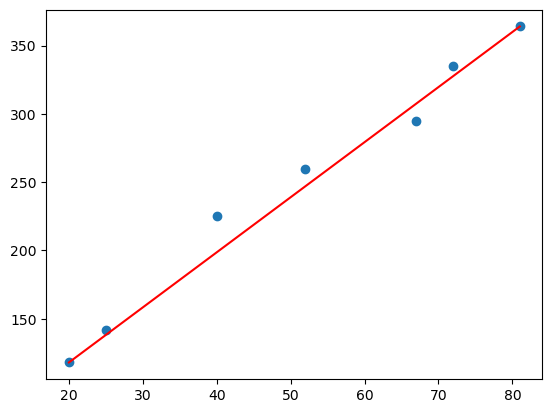

In [6]:
plt.scatter(base['Investimento em marketing'], base['Venda Qtd'])
x0 = base['Investimento em marketing'][0]
y0 = base['Venda Qtd'][0]
x1 = base['Investimento em marketing'][6]
y1 = base['Venda Qtd'][6]
plt.plot([x0,x1],[y0,y1],'r')
plt.show()

# Usando a equação da reta para determinar a venda

## y = ax + b

In [7]:
def encontraY(x_reta,y_reta,x):
    a = (y_reta[1] - y_reta[0])/(x_reta[1] - x_reta[0])
    b = y_reta[1] - a*x_reta[1]
    y = a*x + b
    return y

In [8]:
encontraY([x0,x1],[y0,y1],75)

339.8032786885246

- Se investir 75k em marketing precisarar ter aproximadamente 340000 unidades em estoque!

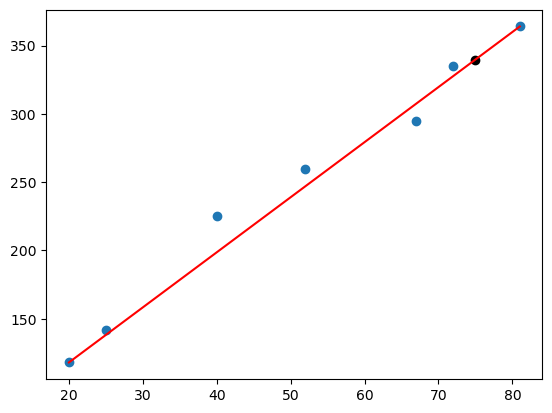

In [9]:
plt.scatter(base['Investimento em marketing'],base['Venda Qtd'])
plt.scatter(75,encontraY([x0,x1],[y0,y1],75), color='k')
x0 = base['Investimento em marketing'][0]
y0 = base['Venda Qtd'][0]
x1 = base['Investimento em marketing'][6]
y1 = base['Venda Qtd'][6]
plt.plot([x0,x1],[y0,y1], 'r')
plt.show()

# Descobrindo a venda usando machine learning

In [10]:
from sklearn import linear_model

In [11]:
reg = linear_model.LinearRegression()

In [12]:
reg.fit(base['Investimento em marketing'].values.reshape(-1,1),base['Venda Qtd'])

LinearRegression()

In [13]:
reg.coef_

array([3.90643623])

In [15]:
reg.intercept_

49.200323514387804

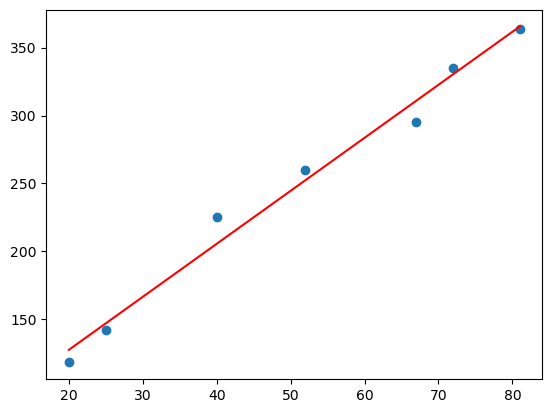

In [16]:
plt.scatter(base['Investimento em marketing'],base['Venda Qtd'])
x = np.array(base['Investimento em marketing'])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,'r')
plt.show()

- Reta criada pelo modelo

In [17]:
reg.predict([[75]])

array([342.18304104])

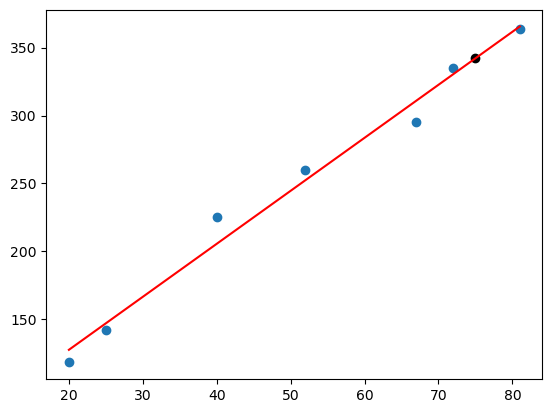

In [18]:
plt.scatter(base['Investimento em marketing'],base['Venda Qtd'])
plt.scatter(75,reg.predict([[75]])[0],color='k')
x = np.array(base['Investimento em marketing'])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,'r')
plt.show()

- A resposta certa é 342.000